<a href="https://colab.research.google.com/github/milelebedin/ColaboratoryNotebooks/blob/main/StreamlistTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
año = ['1866-01-01', '1907-01-01', '1913-01-01', '1920-01-01', '1933-01-01', '1938-01-01', '1933-01-01', '1949-01-01', '1957-01-01']

inventor = ["Jhon Wesley Hyatt - ",
            "Leo Baekeland - ",
            "Jacques Edwin Brandenberger - ",
            "DuPont - ",
            "Ralph Wiley - ",
            "DuPont - ",
            " - ",
            " - ",
            "George de Maestral - "
            ]
pais_origen = ["EE.UU. - ",
               "EE.UU. (New York) - ",
               "Suiza - ",
               "Suiza - ",
               " - ",
               "Suiza - ",
               " - ",
               " - ",
               "Suiza - "
               ]
tipo_plastico = ["CELULOIDE: ",
                 "BAQUELITA: ",
                 "CELOFÁN: ",
                 "NYLON: ",
                 "SARAN: ",
                 "TEFLÓN: ",
                 "POLIETILENO: ",
                 "SILICONA: ",
                 "VELCRO: "
                 ]
uso = [" - ",
       " - ",
       "Usado como una capa protectora para telas. ",
       "Reemplazó a la seda para la fabricación de medias y al cabello animal de los cepillos de dientes. ",
       "Protector de equipamento militar. Se lo utiliza como envase. ",
       "Uso en la cocina. ",
       "Se usa en botellas y sachets. ",
       "La Silly Putty. ",
       "-"
       ]
beneficios = ["Termoplástico, duro, flexible, moldeabe (con calor y presión), que luego mantiene la forma",
              "Rápido moldeado utilizando un molde. Retiene la forma ante cualquier circunstancia",
              " - ",
              "Resistente.",
              " - ",
              "Antiadherente.",
              " - ",
              "Juguetes. ",
              "Imita a las plantas de abrojo: Se adhieren a cualquier cosa con la que entren en contacto."
              ]

In [ ]:
# Creating the DataFrame
df = pd.DataFrame({
    'Año': año,
    'Inventor': inventor,
    'País de Origen': pais_origen,
    'Tipo de Plástico': tipo_plastico,
    'Uso': uso,
    'Beneficios': beneficios
})
df["Año"] = pd.to_datetime(df["Año"])

df

,Año,Inventor,País de Origen,Tipo de Plástico,Uso,Beneficios
0,1866-01-01,Jhon Wesley Hyatt -,EE.UU. -,CELULOIDE:,-,"Termoplástico, duro, flexible, moldeabe (con c..."
1,1907-01-01,Leo Baekeland -,EE.UU. (New York) -,BAQUELITA:,-,Rápido moldeado utilizando un molde. Retiene l...
2,1913-01-01,Jacques Edwin Brandenberger -,Suiza -,CELOFÁN:,Usado como una capa protectora para telas.,-
3,1920-01-01,DuPont -,Suiza -,NYLON:,Reemplazó a la seda para la fabricación de med...,Resistente.
4,1933-01-01,Ralph Wiley -,-,SARAN:,Protector de equipamento militar. Se lo utiliz...,-
5,1938-01-01,DuPont -,Suiza -,TEFLÓN:,Uso en la cocina.,Antiadherente.
6,1933-01-01,-,-,POLIETILENO:,Se usa en botellas y sachets.,-
7,1949-01-01,-,-,SILICONA:,La Silly Putty.,Juguetes.
8,1957-01-01,George de Maestral -,Suiza -,VELCRO:,-,Imita a las plantas de abrojo: Se adhieren a c...


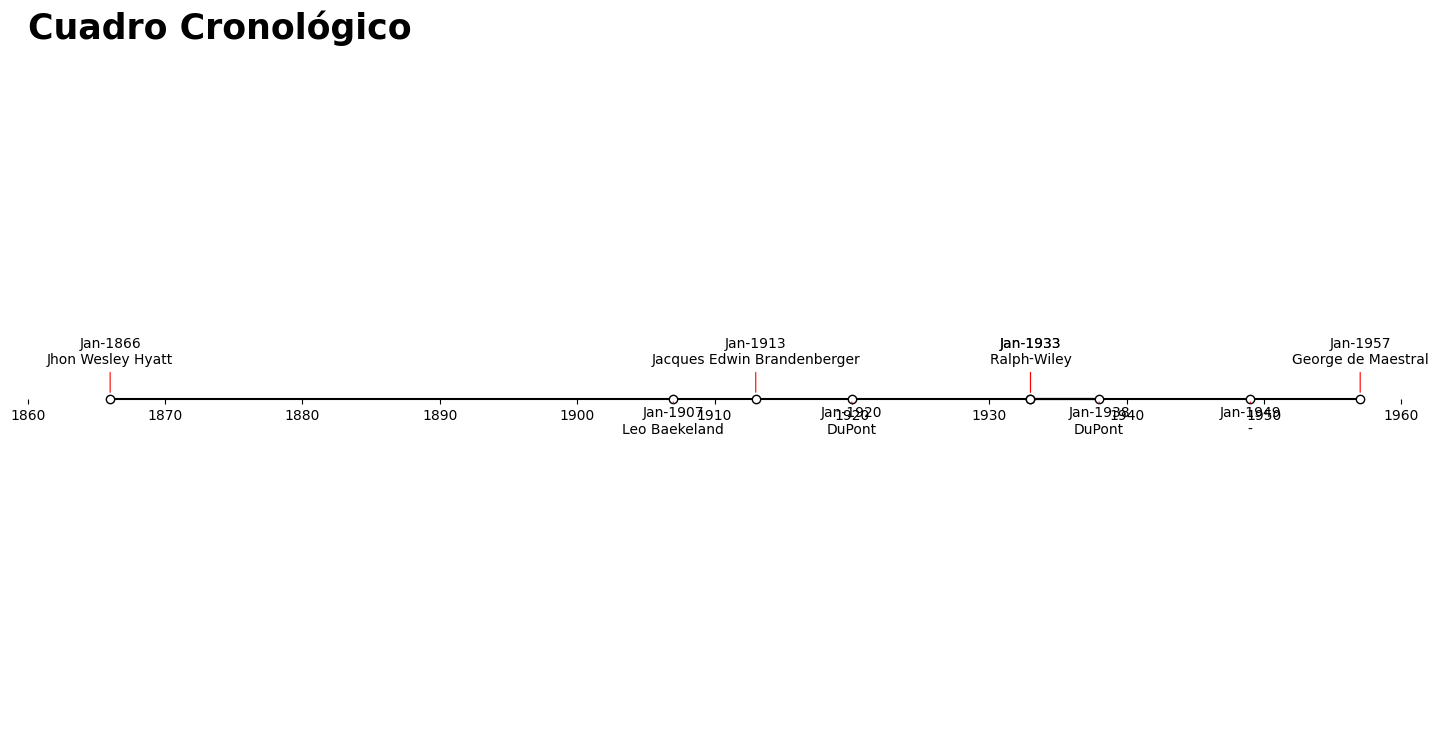

In [ ]:

fig, ax = plt.subplots(figsize=(18,9))

ax.plot(df.Año, [0,]* len(df), "-o", color="black", markerfacecolor="white");

ticks = pd.date_range("1860-1-1", "1960-1-1", freq="10YS")
ax.set_xticks(ticks)
ax.set_xticklabels([tick.strftime('%Y') for tick in ticks])
ax.set_ylim(-10,10);

for idx in range(len(df)):
    dt, product = df["Año"][idx], df["Inventor"][idx]
    tipo_plastico, uso, beneficios = df["Tipo de Plástico"][idx], df["Uso"][idx], df["Beneficios"][idx]
    dt_str = dt.strftime("%b-%Y")
    level = 1 if idx % 2 == 0 else -1  # Alternate annotation levels
    ax.annotate(dt_str + "\n" + product, xy=(dt, 0.1 if level > 0 else -0.1), xytext=(dt, level),
                arrowprops=dict(arrowstyle="-", color="red", linewidth=0.8),
                ha="center")


ax.spines[["left", "top", "right", "bottom"]].set_visible(False);
ax.spines[["bottom"]].set_position(("axes", 0.5));
ax.yaxis.set_visible(False);
ax.set_title("Cuadro Cronológico", pad=10, loc="left", fontsize=25, fontweight="bold");

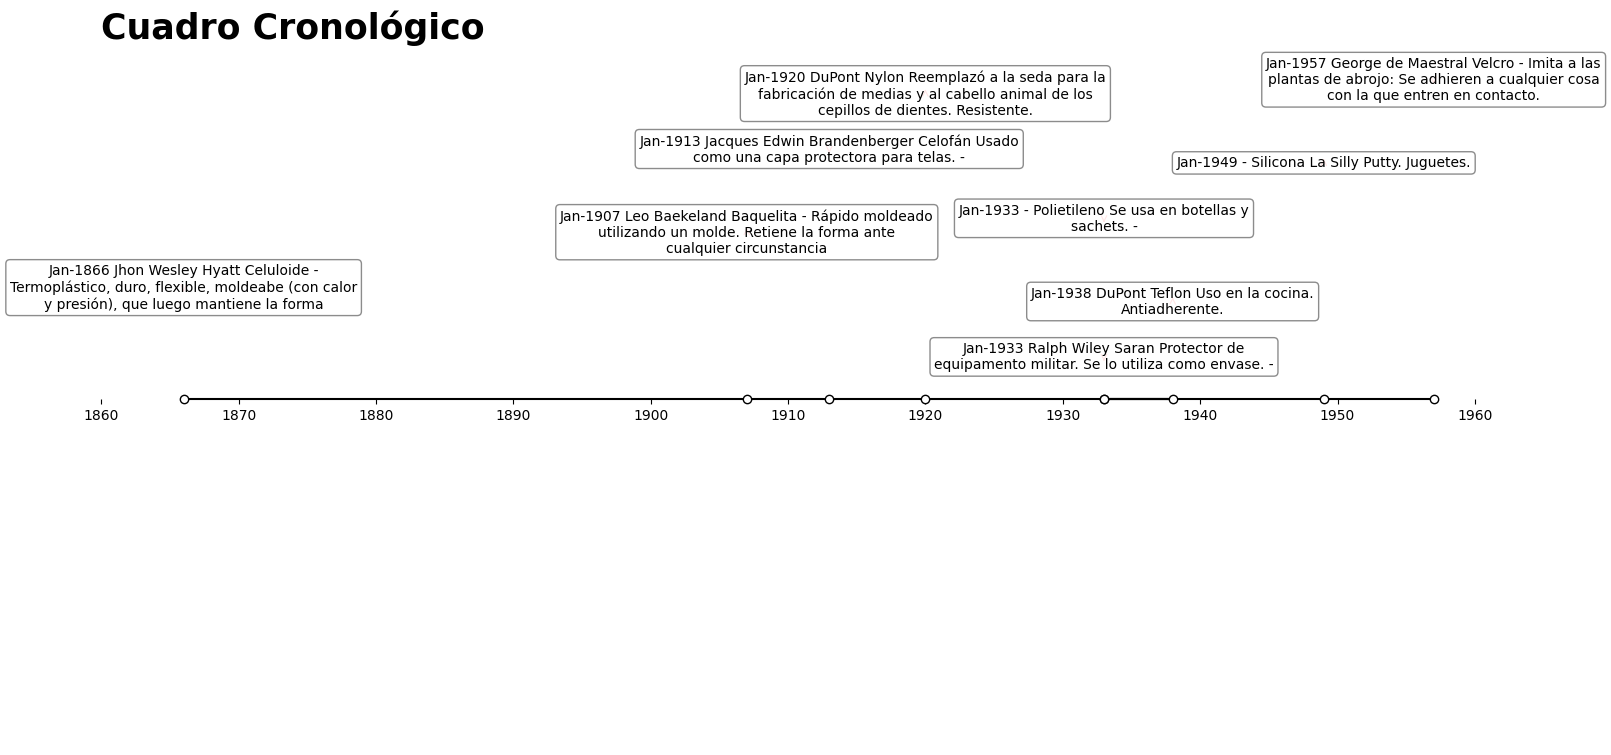

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap  # Import textwrap for text formatting

# Assuming 'df' is your DataFrame and already has the datetime conversion done for 'Año'
fig, ax = plt.subplots(figsize=(18,9))

ax.plot(df.Año, [0]*len(df), "-o", color="black", markerfacecolor="white")

# Set the x-axis ticks and labels
ticks = pd.date_range("1860-01-01", "1960-01-01", freq="10YS")
ax.set_xticks(ticks)
ax.set_xticklabels([tick.strftime('%Y') for tick in ticks])

ax.set_ylim(-10, 10)  # Extend the limits to give more space for annotations

for idx in range(len(df)):
    dt = df["Año"][idx]
    product = df["Inventor"][idx]
    type_plastic = df["Tipo de Plástico"][idx]
    use = df["Uso"][idx]
    benefits = df["Beneficios"][idx]

    dt_str = dt.strftime("%b-%Y")
    info_text = f"{dt_str}\n{product}\n{type_plastic}\n{use}\n{benefits}"
    wrapped_text = textwrap.fill(info_text, width=50)  # Wrap text at 50 characters

    level = 5 if idx % 2 == 0 else -5  # Adjust levels to be further away from the x-axis
    ax.annotate(wrapped_text, xy=(dt, ((idx+1.5)*2)%10), xytext=(0, level), textcoords="offset points",
            va="center", ha="center",
            arrowprops=dict(arrowstyle="->", color="red", linewidth=0.8),  # Cambiado de "-" a "->"
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.9))


ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.spines["bottom"].set_position(("axes", 0.5))
ax.yaxis.set_visible(False)
ax.set_title("Cuadro Cronológico", pad=10, loc="left", fontsize=25, fontweight="bold")

plt.show()


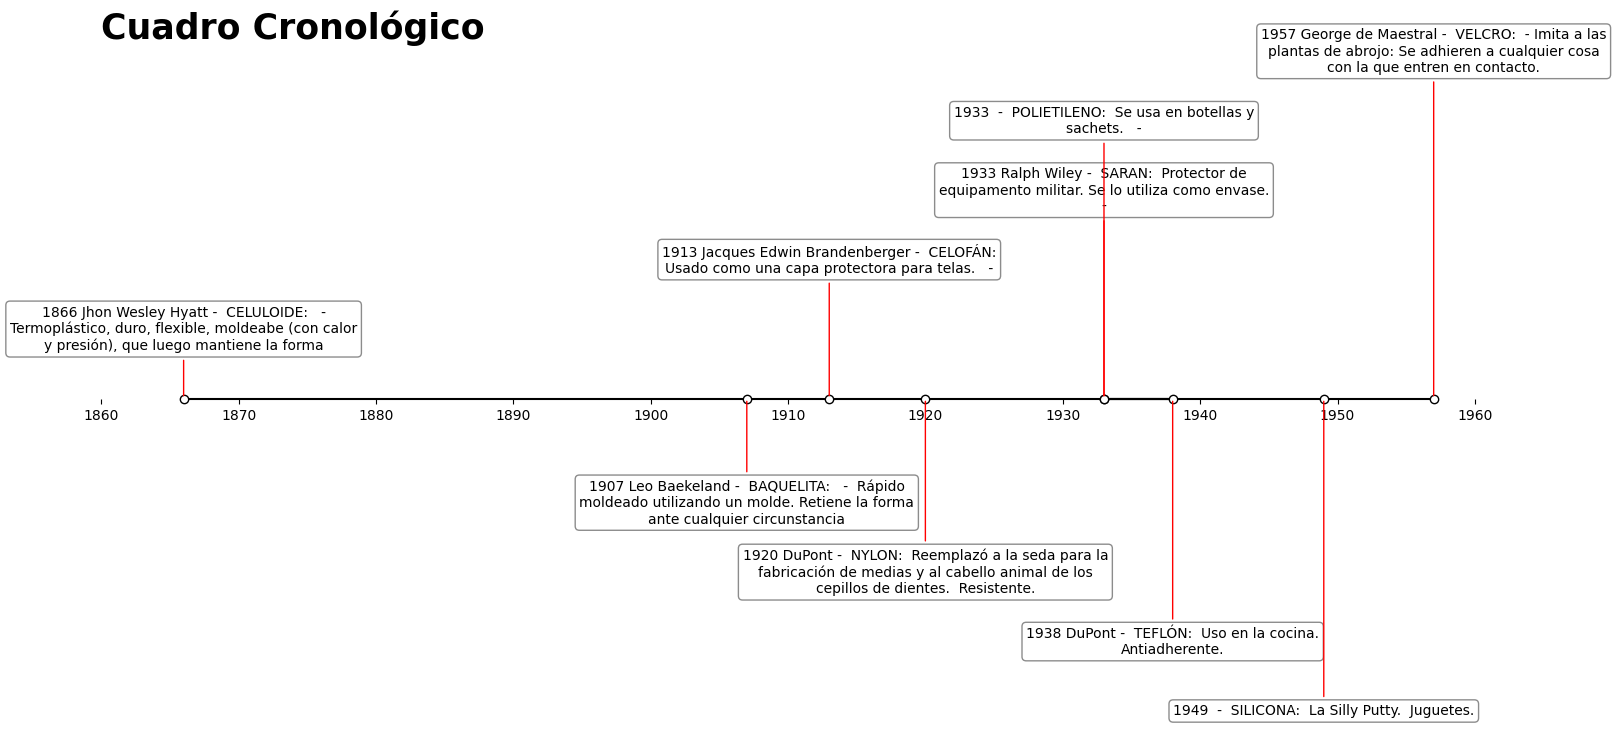

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap  # Import textwrap for text formatting

# Assuming 'df' is your DataFrame and already has the datetime conversion done for 'Año'
fig, ax = plt.subplots(figsize=(18,9))

ax.plot(df.Año, [0]*len(df), "-o", color="black", markerfacecolor="white")

# Set the x-axis ticks and labels
ticks = pd.date_range("1860-01-01", "1960-01-01", freq="10YS")
ax.set_xticks(ticks)
ax.set_xticklabels([tick.strftime('%Y') for tick in ticks])

ax.set_ylim(-10, 10)  # Extend the limits to give more space for annotations

for idx in range(len(df)):
    dt = df["Año"][idx]
    product = df["Inventor"][idx]
    type_plastic = df["Tipo de Plástico"][idx]
    use = df["Uso"][idx]
    benefits = df["Beneficios"][idx]

    dt_str = dt.strftime("%Y")
    info_text = f"{dt_str}\n{product}\n{type_plastic}\n{use}\n{benefits}"
    wrapped_text = textwrap.fill(info_text, width=50)  # Wrap text at 50 characters

    level = 50 if idx % 2 == 0 else -50  # Increase the offset to be more visible
    # Ensure the xytext uses a meaningful offset for visibility
    ax.annotate(wrapped_text, xy=(dt, 0), xytext=(0, (level*(idx+2)/2)), textcoords="offset points",
            va="center", ha="center",
            arrowprops=dict(arrowstyle="-", color="red", lw=1, connectionstyle="arc3"),
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.9, zorder=2), zorder=200)


ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.spines["bottom"].set_position(("axes", 0.5))
ax.yaxis.set_visible(False)
ax.set_title("Cuadro Cronológico", pad=10, loc="left", fontsize=25, fontweight="bold")

plt.show()
